In [32]:
# notebooks/example_notebook.ipynb

import sys
import os
sys.path.append(os.path.abspath('../scripts'))
import numpy as np

In [7]:
from load_data import load_data_from_postgres, check_missing_values, missing_percentage, save_df_to_postgres

In [8]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")

c:\Users\Hp\Desktop\Kifiya\Week 2\TellCo’s Growth Analysis\scripts\load_data.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [34]:
df


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:00,451.0,2019-04-30 06:02:00,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,2019-04-29 07:28:00,483.0,2019-04-30 10:41:00,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,2019-04-29 07:28:00,283.0,2019-04-30 10:46:00,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,2019-04-29 07:28:00,696.0,2019-04-30 10:40:00,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


##### Display Shape of Data

In [10]:
df.shape

(150001, 55)

##### Display Data Types 

In [11]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

##### Overview of Data Structure

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [13]:
check_missing_values(df)

,column_name,missing_count
0,Bearer Id,991
1,Start,1
2,Start ms,1
3,End,1
4,End ms,1
5,Dur. (ms),1
6,IMSI,570
7,MSISDN/Number,1066
8,IMEI,572
9,Last Location Name,1153


##### Calculate percentage of missing values greater than 30%

In [14]:
missing = missing_percentage(df)
missing

['TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B']

In [15]:
selected_columns = [
    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
    'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B',
    'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL',
    'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B'
]
selected_data = df[selected_columns]
selected_data.describe()

,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),HTTP DL (Bytes),HTTP UL (Bytes),Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B
count,6.185500e+04,5.335200e+04,6.852700e+04,6.819100e+04,52463.000000,57107.000000,56415.000000,19747.000000,61684.000000,38158.000000
mean,2.080991e+07,7.596587e+05,1.144710e+08,3.242301e+06,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812
std,1.825665e+08,2.645305e+07,9.631946e+08,1.957064e+07,2546.524440,1445.365032,1842.162008,1219.112287,1946.387608,993.349688
min,2.000000e+00,1.000000e+00,4.000000e+01,4.000000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.565150e+04,4.694750e+03,1.124035e+05,2.432200e+04,20.000000,10.000000,26.000000,2.000000,39.000000,3.000000
50%,5.687300e+05,2.094950e+04,1.941949e+06,2.297330e+05,128.000000,52.000000,164.000000,8.000000,288.000000,8.000000
75%,3.768308e+06,8.402025e+04,2.504290e+07,1.542827e+06,693.500000,203.000000,757.000000,35.000000,1092.000000,31.000000
max,4.294426e+09,2.908226e+09,7.253064e+10,1.491890e+09,81476.000000,85412.000000,58525.000000,50553.000000,66913.000000,49565.000000


#### Check for Pairwise Missingness

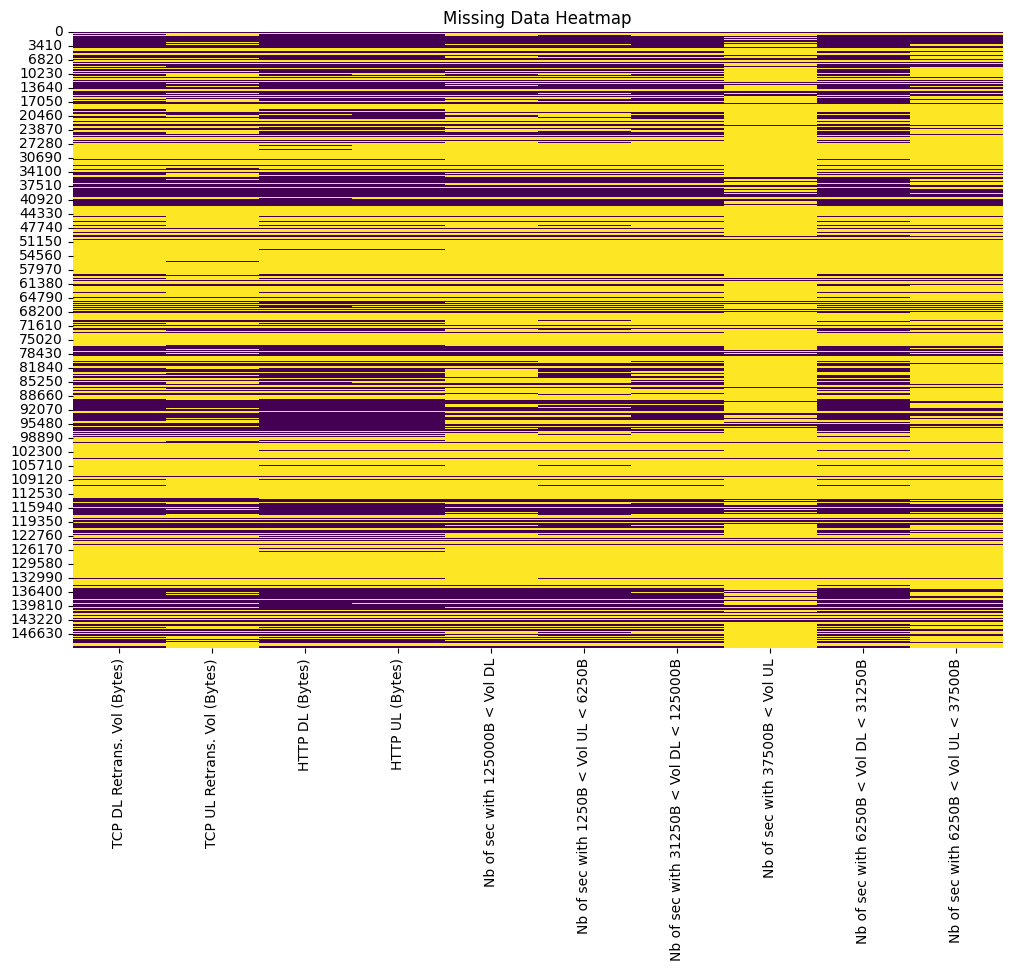

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boolean DataFrame indicating missing values
missing_data = df[selected_columns].isnull()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

#### Correlation of Missing Values

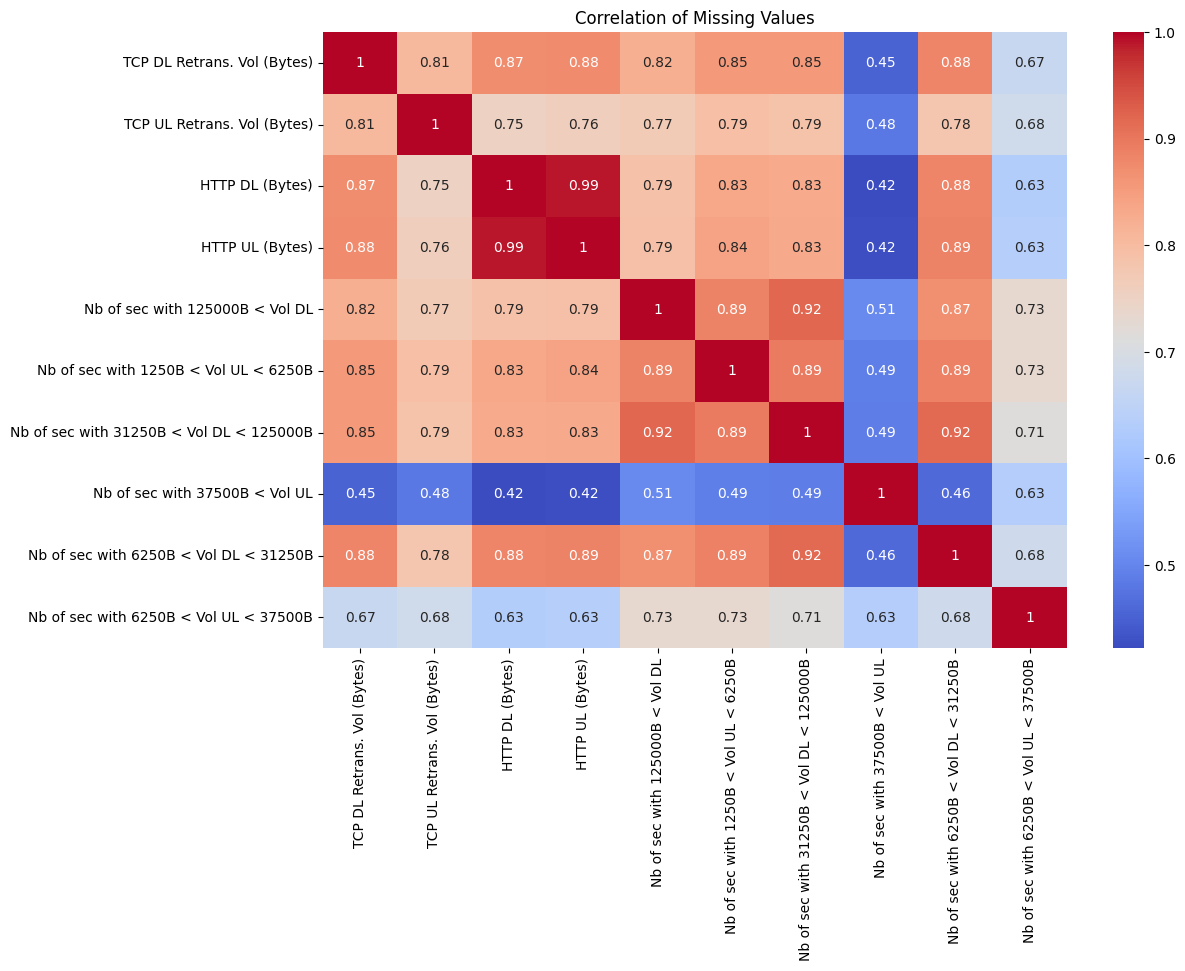

In [17]:
# Calculate the correlation of missing values
missing_corr = missing_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(missing_corr, annot=True, cmap='coolwarm')
plt.title('Correlation of Missing Values')
plt.show()

#### Bar Chart

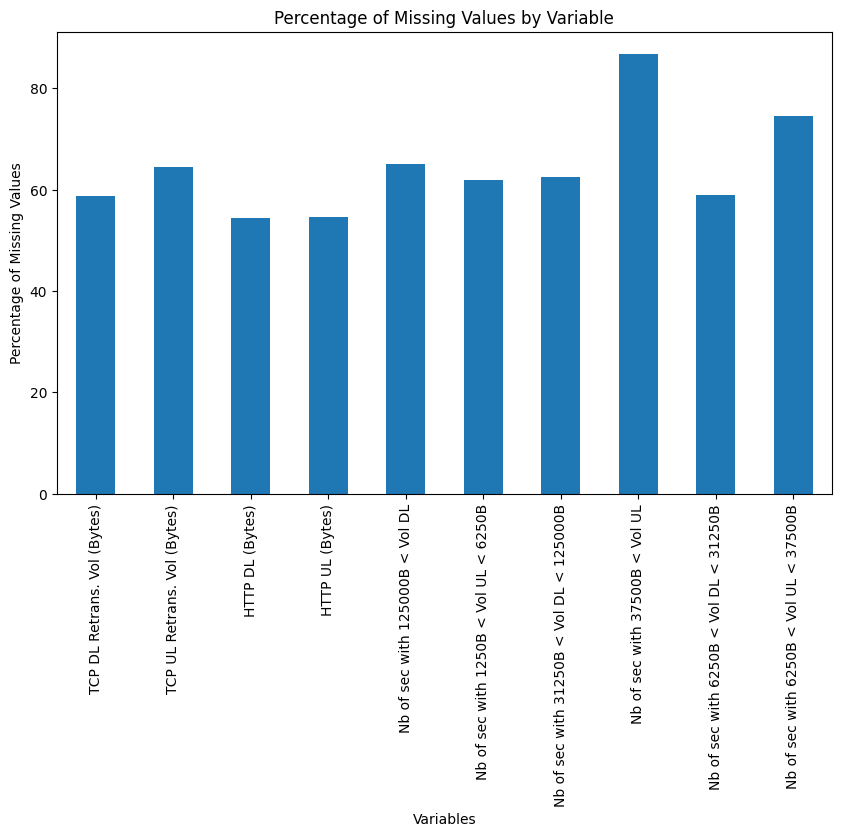

In [18]:
missing_percentages = df[selected_columns].isnull().mean() * 100
# Plotting the missing percentages
plt.figure(figsize=(10, 6))
missing_percentages.plot(kind='bar')
plt.title('Percentage of Missing Values by Variable')
plt.xlabel('Variables')
plt.ylabel('Percentage of Missing Values')
plt.xticks()
plt.show()

#### Scatter Plots:

Plot variables with missing values against other variables.
Check if there’s any relationship between the missingness of one variable and the values of another. If missingness depends on the values of other variables, it might suggest MAR. 

In [19]:
"""columns_with_missing_values = missing_percentage(df)
def plot_missing_vs_variable(df, variable, target):
    for target in targets:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[variable], y=df[target].isnull())
        plt.title(f'Scatter Plot of {variable} vs Missing {target}')
        plt.xlabel(variable)
        plt.ylabel(f'Missing {target}')
        plt.show()

variables = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)']
targets = ['Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B']

for variable in columns_with_missing_values:
    plot_missing_vs_variable(df, variable, targets)"""

"columns_with_missing_values = missing_percentage(df)\ndef plot_missing_vs_variable(df, variable, target):\n    for target in targets:\n        plt.figure(figsize=(10, 6))\n        sns.scatterplot(x=df[variable], y=df[target].isnull())\n        plt.title(f'Scatter Plot of {variable} vs Missing {target}')\n        plt.xlabel(variable)\n        plt.ylabel(f'Missing {target}')\n        plt.show()\n\nvariables = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)']\ntargets = ['Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B']\n\nfor variable in columns_with_missing_values:\n    plot_missing_vs_variable(df, variable, targets)"

#### TCP DL Retrans. Vol (Bytes):
Recommendation: K-Nearest Neighbors (KNN) Imputation
Reason: Given the high variability and the strong correlation with TCP UL Retrans. Vol (Bytes), KNN can leverage the similarity between observations to impute missing values effectively.

In [20]:
from sklearn.impute import KNNImputer
# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data for the specific columns
df[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']] = imputer.fit_transform(df[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']])

# Check the imputed data
print(df[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].head())

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)
0                 2.080991e+07                759658.664811
1                 2.080991e+07                759658.664811
2                 2.080991e+07                759658.664811
3                 2.080991e+07                759658.664811
4                 2.080991e+07                759658.664811


#### MICE
High Correlation: The strong correlation indicates that the missingness in one variable can be effectively predicted using the other.
Descriptive Statistics: The large difference in means and standard deviations suggests that simple imputation methods like mean or median might not capture the underlying relationship accurately.
Complex Relationships: MICE can handle complex relationships between variables, making it suitable for this scenario.

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Calculate means before imputation
mean_before_dl = df['HTTP DL (Bytes)'].mean()
mean_before_ul = df['HTTP UL (Bytes)'].mean()

# Initialize the MICE imputer
imputer = IterativeImputer()

# Fit and transform the data for the specific columns
df[['HTTP DL (Bytes)', 'HTTP UL (Bytes)']] = imputer.fit_transform(df[['HTTP DL (Bytes)', 'HTTP UL (Bytes)']])

# Calculate means after imputation
mean_after_dl = df['HTTP DL (Bytes)'].mean()
mean_after_ul = df['HTTP UL (Bytes)'].mean()

# Print the means before and after imputation
print(f"Mean of HTTP DL (Bytes) before imputation: {mean_before_dl}")
print(f"Mean of HTTP DL (Bytes) after imputation: {mean_after_dl}")
print(f"Mean of HTTP UL (Bytes) before imputation: {mean_before_ul}")
print(f"Mean of HTTP UL (Bytes) after imputation: {mean_after_ul}")

Mean of HTTP DL (Bytes) before imputation: 114471023.70188393
Mean of HTTP DL (Bytes) after imputation: 114163604.32899716
Mean of HTTP UL (Bytes) before imputation: 3242301.384874837
Mean of HTTP UL (Bytes) after imputation: 3230663.3072017943


##### Nb of sec with 125000B < Vol DL:
Recommendation: Multivariate Imputation by Chained Equations (MICE)
Reason: The high variability and potential relationships with other download volume metrics make MICE a good choice to capture these dependencies.

In [22]:
# Initialize IterativeImputer
imputer = IterativeImputer()

# Calculate mean and median before imputation
mean_before_125000 = df['Nb of sec with 125000B < Vol DL'].mean()
median_before_125000 = df['Nb of sec with 125000B < Vol DL'].median()

# Fit and transform the data
imputed_values = imputer.fit_transform(df[['Nb of sec with 125000B < Vol DL', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 6250B < Vol DL < 31250B']])
df['Nb of sec with 125000B < Vol DL'] = imputed_values[:, 0]

# Calculate mean and median after imputation
mean_after_125000 = df['Nb of sec with 125000B < Vol DL'].mean()
median_after_125000 = df['Nb of sec with 125000B < Vol DL'].median()

print(f"Mean of 'Nb of sec with 125000B < Vol DL' before imputation: {mean_before_125000}")
print(f"Mean of 'Nb of sec with 125000B < Vol DL' after imputation: {mean_after_125000}")
print(f"Median of 'Nb of sec with 125000B < Vol DL' before imputation: {median_before_125000}")
print(f"Median of 'Nb of sec with 125000B < Vol DL' after imputation: {median_after_125000}")

print("After Imputation:")
print(df)

Mean of 'Nb of sec with 125000B < Vol DL' before imputation: 989.6999980938947
Mean of 'Nb of sec with 125000B < Vol DL' after imputation: 905.3919951020006
Median of 'Nb of sec with 125000B < Vol DL' before imputation: 128.0
Median of 'Nb of sec with 125000B < Vol DL' after imputation: 905.3919951019986
After Imputation:
           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   1

#### Analysis of Missing Data
###### Nb of sec with 1250B < Vol UL < 6250B:
###### Missing Percentage: The bar chart shows a moderate percentage of missing values for this variable.
###### Chosen Method: K-Nearest Neighbors (KNN) Imputation
###### Reason: KNN is effective for moderate levels of missing data and can capture local patterns based on the nearest neighbors.
###### Nb of sec with 31250B < Vol DL < 125000B:
###### Missing Percentage: This variable has a significant percentage of missing values.
###### Chosen Method: Multiple Imputation by Chained Equations (MICE)
###### Reason: MICE is robust for handling high percentages of missing data and can model complex relationships between variables iteratively.
###### Nb of sec with 6250B < Vol DL < 31250B:
###### Missing Percentage: The bar chart indicates a moderate to high percentage of missing values.
###### Chosen Method: Regression Imputation
###### Reason: Regression imputation is suitable for variables with linear relationships and can handle moderate to high levels of missing data effectively.

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

# KNN Imputation for 'Nb of sec with 1250B < Vol UL < 6250B'
knn_imputer = KNNImputer(n_neighbors=5)
imputed_values_knn = knn_imputer.fit_transform(df[['Nb of sec with 1250B < Vol UL < 6250B', 
                                                   'Nb of sec with 6250B < Vol UL < 37500B', 
                                                   'Nb of sec with 37500B < Vol UL']])
df['Nb of sec with 1250B < Vol UL < 6250B'] = imputed_values_knn[:, 0]

# MICE for 'Nb of sec with 31250B < Vol DL < 125000B'
imputer = IterativeImputer()
imputed_values_mice = imputer.fit_transform(df[['Nb of sec with 31250B < Vol DL < 125000B', 
                                                'Nb of sec with 125000B < Vol DL', 
                                                'Nb of sec with 6250B < Vol DL < 31250B']])
df['Nb of sec with 31250B < Vol DL < 125000B'] = imputed_values_mice[:, 0]

# Regression Imputation for 'Nb of sec with 6250B < Vol DL < 31250B'
X = imputed_values_mice[:, [0, 1]]  # Using imputed values for regression
y = df['Nb of sec with 6250B < Vol DL < 31250B'].values


print("After Imputation:")
print(df)

After Imputation:
           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0    

In [24]:
import numpy as np
# Assuming df and imputed_values_mice are already defined
X = imputed_values_mice[:, [0, 1]]  # Using imputed values for regression
y = df['Nb of sec with 6250B < Vol DL < 31250B'].values

# Check if there are any non-missing values in y
non_missing_mask = ~np.isnan(y)
if np.sum(non_missing_mask) > 0:
    reg = LinearRegression()
    reg.fit(X[non_missing_mask], y[non_missing_mask])
    
    # Predict missing values
    missing_mask = np.isnan(y)
    if np.sum(missing_mask) > 0:
        y_pred = reg.predict(X[missing_mask])
        df.loc[missing_mask, 'Nb of sec with 6250B < Vol DL < 31250B'] = y_pred

print("After Imputation:")
print(df)

After Imputation:
           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0    

In [25]:
check_missing_values(df)

,column_name,missing_count
0,Bearer Id,991
1,Start,1
2,Start ms,1
3,End,1
4,End ms,1
5,Dur. (ms),1
6,IMSI,570
7,MSISDN/Number,1066
8,IMEI,572
9,Last Location Name,1153


In [26]:
df['Nb of sec with 37500B < Vol UL'] = df['Nb of sec with 37500B < Vol UL'].fillna(df['Nb of sec with 37500B < Vol UL'].median())

In [27]:
df['Nb of sec with 6250B < Vol UL < 37500B'] = df['Nb of sec with 6250B < Vol UL < 37500B'].fillna(df['Nb of sec with 6250B < Vol UL < 37500B'].median())


In [28]:
df['Avg RTT DL (ms)'] = df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean())
df['Avg RTT UL (ms)'] = df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean())

#### Simple Imputation for All Columns:
Since the missing values are less than 1% for all columns, I can use simple imputation methods like the median for numerical columns and the mode for categorical columns. 
Numerical Columns: Exclude ID columns from median imputation.
ID Columns: Use a placeholder value like -1 for missing IDs.
Categorical Columns: Use the mode for imputation.

In [29]:
import pandas as pd
# Define columns
datetime_columns = ['Start', 'End']
numerical_columns = ['Start ms', 'End ms', 'Dur. (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Total UL (Bytes)', 'Total DL (Bytes)']
id_columns = ['Bearer Id', 'IMSI', 'IMEI', 'MSISDN/Number']
categorical_columns = ['Last Location Name', 'Handset Manufacturer', 'Handset Type']

# Convert datetime columns to datetime format
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Fill missing values for datetime columns with a placeholder date
placeholder_date = pd.Timestamp('1900-01-01')
for col in datetime_columns:
    df[col] = df[col].fillna(placeholder_date)

# Fill missing values for numerical columns and ID columns with -1
for col in numerical_columns + id_columns:
    df[col] = df[col].fillna(-1)

# Fill missing values for categorical columns with 'Unknown'
for col in categorical_columns:
    df[col] = df[col].fillna('Unknown')


In [30]:
check_missing_values(df)


,column_name,missing_count


#### Save cleaned Data to postgress Database

In [31]:
save_df_to_postgres(df, 'cleaned_xdr_data')